In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("wine.csv")

In [3]:
# Separate the dependent variable (Wine) from the independent variables
X = data.iloc[:, 1:]  # Independent variables
Y = data["Wine"]      # Dependent variable

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [7]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance*100)

[35.90006573 18.69193449]


In [8]:
total = 0
count = 0
for ev in explained_variance:
    count+=1
    total += ev
    if total > .9:
        break
print(total, count)

0.5459200022286603 2


In [9]:
# Train a Logistic Regression model on the PCA-transformed data
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_pca, Y_train)

LogisticRegression(random_state=42)

In [10]:
# Predict the labels for the test set
Y_pred = classifier.predict(X_test_pca)


In [11]:
# Calculate and display the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Display accuracy score
accuracy = accuracy_score(Y_test, Y_pred)

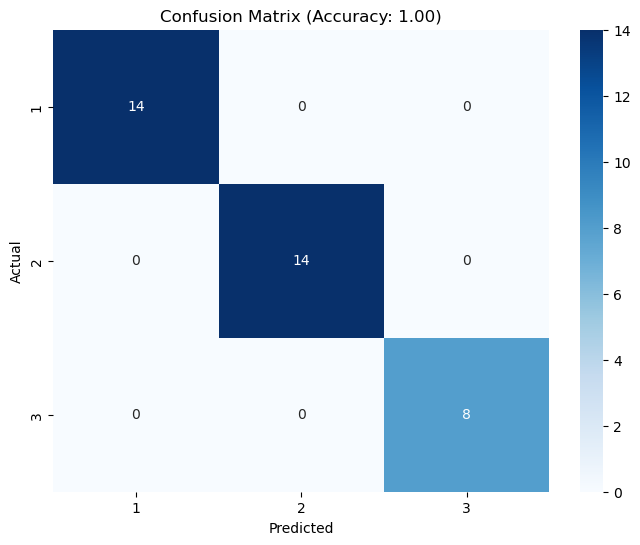

In [12]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data["Wine"].unique(), yticklabels=data["Wine"].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()

In [13]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



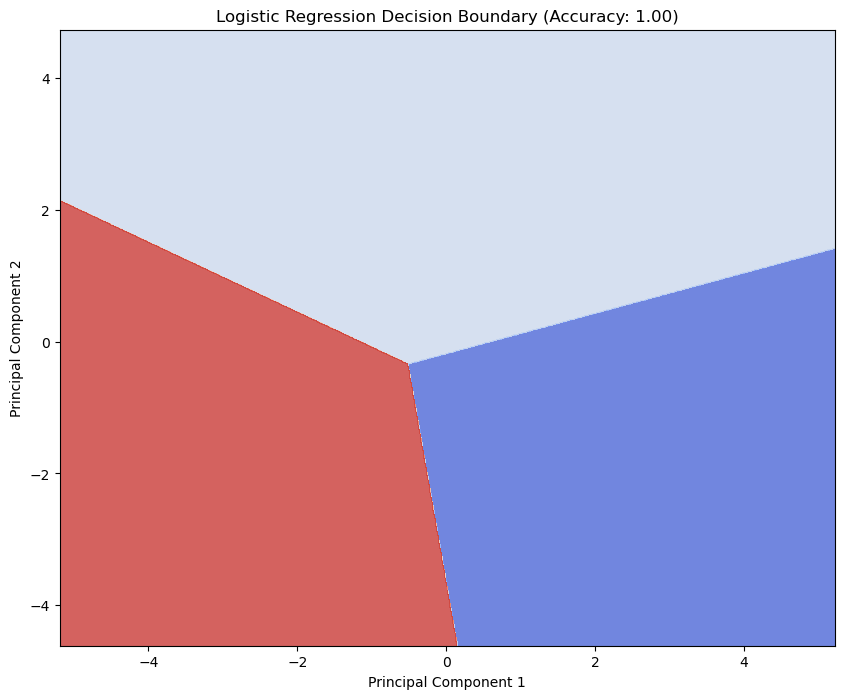

In [15]:
# --- Logistic Regression Decision Boundary Plot ---

# Create a mesh grid to plot the decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the classification for each point in the mesh grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training data
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# # Scatter plot of the PCA-transformed training data
# scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, edgecolors='k', s=100, cmap=plt.cm.coolwarm)

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Logistic Regression Decision Boundary (Accuracy: {accuracy:.2f})")
# plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

In [ ]:
# --- Logistic Regression Decision Boundary Plot for Test Data ---

# Create a mesh grid to plot the decision boundaries
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the classification for each point in the mesh grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the test data
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Scatter plot of the PCA-transformed test data
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test, edgecolors='k', s=100, cmap=plt.cm.coolwarm)

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Logistic Regression Decision Boundary on Test Data (Accuracy: {accuracy:.2f})")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


In [ ]:
data

In [ ]:
for i in data.columns:
    data[i].hist()
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("wine.csv")

# Separate the dependent variable (Wine) from the independent variables
X = data.iloc[:, 1:]  # Independent variables
Y = data["Wine"]      # Dependent variable

# Bootstrapping: Resample the dataset with replacement to create a larger dataset
def bootstrap_data(X, Y, n_samples):
    indices = np.random.choice(len(X), size=n_samples, replace=True)  # Sampling with replacement
    X_bootstrap = X.iloc[indices].reset_index(drop=True)
    Y_bootstrap = Y.iloc[indices].reset_index(drop=True)
    return X_bootstrap, Y_bootstrap

# Let's assume you want to increase the dataset size to 1000000 samples (for example)
X_bootstrap, Y_bootstrap = bootstrap_data(X, Y, n_samples=1000000)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_bootstrap, Y_bootstrap, test_size=0.2, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a Logistic Regression model on the PCA-transformed data
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_pca, Y_train)

# Predict the labels for the test set
Y_pred = classifier.predict(X_test_pca)

# Calculate and display the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Display accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()

# --- Logistic Regression Decision Boundary Plot for Test Data ---

# Create a mesh grid to plot the decision boundaries
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the classification for each point in the mesh grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the test data
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Scatter plot of the PCA-transformed test data
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test, edgecolors='k', s=100, cmap=plt.cm.coolwarm)

# Add labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Logistic Regression Decision Boundary on Test Data (Accuracy: {accuracy:.2f})")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()
